In [1]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Using Pandas Library to use the Data Frames for saving the distance values
from tqdm import tqdm

# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


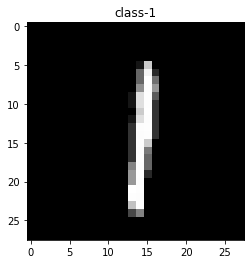

Train image 8032-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  21 203   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 102 243  40   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 102 254 112   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/sysadm/Documents/sem_2_Biswajit_rana/RKMVERI_2ND/class/ML/SS_assignments_1/'

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [3]:
# Your validation set extraction script/code
#np.random.seed(20)
#rand_ids = np.random.choice(np.arange(len(train_images)),train_images.shape[0], replace = False)
#print(rand_ids)
#rand_ids_20,rand_ids_80 = np.hsplit(rand_ids, np.array([int(0.2 * len(train_images))]))
#print(train_images[rand_ids_20[5]])

In [3]:
# Your validation set extraction script/code

# Reshaping the images data
train_reshape = np.array(train_images.reshape(60000, 28*28), dtype = np.float64)
np.random.seed(20)
# Randomly selecting the indices
train_random = np.random.choice(range(60000), 60000, replace = False)
# Making the dataframe
train_df = train_reshape[train_random]
# Selecting Validating Set
valid_img = train_df[:12000]
# Selecting Trainning Set
train_img = train_df[12000:]
# Similarly, doing for labels
random_lab = train_labels[train_random]
valid_lab = random_lab[:12000]
train_lab = random_lab[12000:]
# Reshaping the test images
test_img = np.array(test_images.reshape(10000, 28*28), dtype = np.float64)
print(test_img)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(train_img.shape)
print(valid_img.shape)
print(train_lab.shape)
print(valid_lab.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

# K-NN Code and Distance Functions

In [7]:
# Your k-NN algorithm script/code 

# Defining Distance Function
def euclid_dist(x):
    return np.linalg.norm(train_img - x, axis = 1)

def manhat_dist(x):
    return np.sum(np.abs(train_img - x), axis = 1)

def chebyshev_dist(x):
    return np.max(np.abs(train_img - x), axis = 1)

# Defining Accuracy Function 
def acc_percentage(x,y):
    z = (np.array(x) == np.array(y))
    return (np.sum(z)*100)/len(x)

#////////////////////////////////////////////////////////////////////////////////////////////////////////

# Defining Prediction Function for k = 1, 3, 5,..., 25

def prediction(data, function):
    a = {} # Dictionary
    for i in range(1,26,2):
        a[i] = []
    for j in data:
        temp = function(j)
        temp_dataframe = pd.DataFrame(temp)
        temp_dataframe["label"] = train_lab
        temp_sort = temp_dataframe.sort_values(by = [0])
        for k in range(1,26,2):
            temp_k = temp_sort.iloc[0:k]
            b = temp_k.value_counts("label").index[0]
            a[k].append(b)
    print("The values of k are in column indexes and the values along column are predictions")
    return pd.DataFrame(a)
    

# Defining Prediction Function for a particular value of k
    
def prediction_k(data, k, function):
    a = {} # Dictionary
    for i in range(1,k+1,2):
        a[i] = []
    for j in data:
        temp = function(j)
        temp_dataframe = pd.DataFrame(temp)
        temp_dataframe["label"] = train_lab
        temp_sort = temp_dataframe.sort_values(by = [0])
        temp_k = temp_sort.iloc[0:k]
        b = temp_k.value_counts("label").index[0]
        a[k].append(b)
    print("The values of {} are in column indexes and the values along column are predictions". format(k))
    return pd.DataFrame(a[k])

# Euclidean 

The values of k are in column indexes and the values along column are predictions
       1   3   5   7   9   11  13  15  17  19  21  23  25
0       9   9   9   9   9   9   9   9   9   9   9   9   9
1       5   5   5   5   5   5   5   5   5   5   5   5   5
2       7   7   7   7   7   7   7   7   7   7   7   7   7
3       7   7   7   7   7   7   7   7   7   7   7   7   7
4       1   1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   2   2   2   2   2   2   2   2   2   2   2   2   2
11996   9   9   9   9   9   9   9   9   9   9   9   9   9
11997   8   8   8   8   8   8   8   8   8   8   8   8   8
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   4   4   4   4   4   4   4   4   4   9   9   9   9

[12000 rows x 13 columns]
CPU times: user 30min 52s, sys: 13min 46s, total: 44min 38s
Wall time: 44min 54s


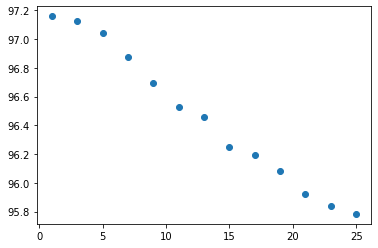

In [8]:
%%time
Euclid = prediction(valid_img, euclid_dist)
print(Euclid)
acc_Euclid = Euclid.apply(acc_percentage, y = valid_lab).sort_values(ascending = False)
acc_Euclid

# Finding the Highest k
Euclid_k_highest = acc_Euclid.index[0]
Euclid_k_highest
# Finding the Highest Accuracy
Euclid_Value = acc_Euclid.values[0];
Euclid_Value
plt.scatter(acc_Euclid.index, acc_Euclid.values)

In [72]:
acc_Euclid

1     97.158333
3     97.125000
5     97.041667
7     96.875000
9     96.691667
11    96.525000
13    96.458333
15    96.250000
17    96.191667
19    96.083333
21    95.925000
23    95.841667
25    95.783333
dtype: float64

# Manhaten

The values of k are in column indexes and the values along column are predictions
       1   3   5   7   9   11  13  15  17  19  21  23  25
0       9   9   9   9   9   9   9   9   9   9   9   9   9
1       5   5   5   5   5   5   5   5   5   5   5   5   5
2       7   7   7   7   7   7   7   7   7   7   7   7   7
3       7   7   7   7   7   7   7   7   7   7   7   7   7
4       1   1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   2   2   2   2   2   2   2   2   2   2   2   2   2
11996   9   9   9   9   9   9   9   9   9   9   9   9   9
11997   8   8   8   8   8   8   8   8   8   8   8   8   8
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   4   4   4   4   4   4   4   4   4   4   4   4   9

[12000 rows x 13 columns]
CPU times: user 17min 43s, sys: 14min 34s, total: 32min 17s
Wall time: 32min 18s


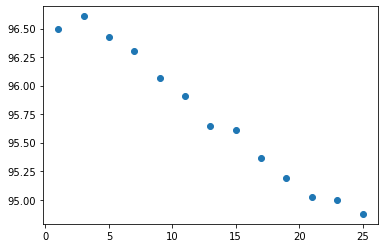

In [73]:
%%time
Manhaten = prediction(valid_img, manhat_dist)
print(Manhaten)
acc_Manhaten = Manhaten.apply(acc_percentage, y = valid_lab).sort_values(ascending = False)
acc_Manhaten

# Finding the Highest k
Manhaten_k_highest = acc_Manhaten.index[0]
Manhaten_k_highest
# Finding the Highest Accuracy
Manhaten_Value = acc_Manhaten.values[0]
Manhaten_Value
plt.scatter(acc_Manhaten.index, acc_Manhaten.values)

In [74]:
acc_Manhaten

3     96.608333
1     96.500000
5     96.425000
7     96.300000
9     96.066667
11    95.908333
13    95.641667
15    95.608333
17    95.366667
19    95.191667
21    95.025000
23    95.000000
25    94.875000
dtype: float64

# Chebyshev

The values of k are in column indexes and the values along column are predictions
       1   3   5   7   9   11  13  15  17  19  21  23  25
0       9   9   9   9   9   9   9   9   9   9   9   9   9
1       0   0   3   0   7   7   7   7   7   3   7   7   7
2       6   4   4   4   4   4   4   4   4   4   4   4   4
3       7   7   7   7   7   7   7   7   7   7   7   7   7
4       1   1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   6   6   6   6   6   6   2   2   2   6   6   6   6
11996   9   9   9   9   9   9   9   9   9   9   9   9   9
11997   3   3   3   3   3   3   3   3   3   3   3   3   3
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   9   8   8   8   8   8   8   8   8   8   8   8   8

[12000 rows x 13 columns]
CPU times: user 17min 31s, sys: 14min 32s, total: 32min 4s
Wall time: 32min 5s


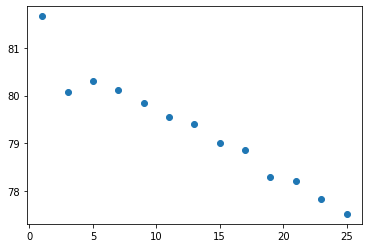

In [75]:
%%time
Chebyshev = prediction(valid_img, chebyshev_dist)
print(Chebyshev)
acc_Chebyshev = Chebyshev.apply(acc_percentage, y = valid_lab).sort_values(ascending = False)
acc_Chebyshev

# Finding the Highest k
Chebyshev_k_highest = acc_Chebyshev.index[0]
Chebyshev_k_highest
# Finding the Highest Accuracy
Chebyshev_Value = acc_Chebyshev.values[0]
Chebyshev_Value
plt.scatter(acc_Chebyshev.index, acc_Chebyshev.values)

In [127]:
acc_Chebyshev

1     81.666667
5     80.300000
7     80.125000
3     80.075000
9     79.841667
11    79.541667
13    79.400000
15    79.000000
17    78.858333
19    78.300000
21    78.208333
23    77.825000
25    77.516667
dtype: float64

# Plots using Matplotlib

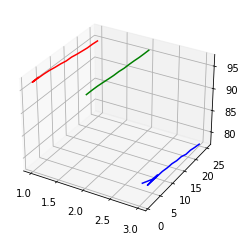

In [181]:
# 3D Plot of X = p vs Y = k vs Z = Accuracy Percentage

ax = plt.axes(projection='3d')

x1 = [1]*13 # Manhaten i.e. p = 1
x2 = [2]*13 # Euclidean i.e. p = 2
x3 = [3]*13 # Chebyshev i.e. p = 3

y1 = np.array(acc_Manhaten.index)
y2 = np.array(acc_Euclid.index)
y3 = np.array(acc_Chebyshev.index)

z1 = acc_Manhaten.values
z2 = acc_Euclid.values
z3 = acc_Chebyshev.values

ax.plot3D(x1, y1, z1, 'red')
ax.plot3D(x2, y2, z2, 'green')
ax.plot3D(x3, y3, z3, 'blue')

# Using K-NN for Test Dataset

In [165]:
%%time
# Since the maximum accuracy percentage is 97.158333 using Euclidean Metric in these above mention 3 methods,
# we are now plotting the test data about Eucledian for k = 1

Euclid_test = prediction_k(test_img, 1, euclid_dist)
print(Euclid_test)

The values of 1 are in column indexes and the values along column are predictions
      0
0     7
1     2
2     1
3     0
4     4
...  ..
9995  2
9996  3
9997  4
9998  5
9999  6

[10000 rows x 1 columns]
CPU times: user 14min 19s, sys: 12min 11s, total: 26min 30s
Wall time: 26min 31s


In [171]:
%%time
# We are now plotting the test data about Manhaten for k = 3 (Accuracy = 96.608333)

Manhaten_test = prediction_k(test_img, 3, manhat_dist)
print(Manhaten_test)

The values of 3 are in column indexes and the values along column are predictions
      0
0     7
1     2
2     1
3     0
4     4
...  ..
9995  2
9996  3
9997  4
9998  5
9999  6

[10000 rows x 1 columns]
CPU times: user 14min 53s, sys: 12min 44s, total: 27min 38s
Wall time: 27min 38s


In [172]:
%%time
# We are now plotting the test data about Eucledian for k = 1 (Accuracy = 81.666667)

Chebyshev_test = prediction_k(test_img, 1, chebyshev_dist)
print(Chebyshev_test)

The values of 1 are in column indexes and the values along column are predictions
      0
0     7
1     2
2     1
3     0
4     4
...  ..
9995  2
9996  3
9997  4
9998  3
9999  6

[10000 rows x 1 columns]
CPU times: user 14min 3s, sys: 12min 7s, total: 26min 10s
Wall time: 26min 11s


# Confussion Matrix

In [168]:
# Defining the Confusion Matrix
def CM_Matrix(x):
    CM = np.array(np.zeros((100),dtype = np.int32).reshape(10,10))
    for i,j in zip(test_labels, x):
        CM[i,j] += 1
    return pd.DataFrame(CM)

In [180]:
# Confussion Matrix of test images using Eulidean Metric with K = 1 

print("The Column-wise labels are Actual and Row-wise labels are Predicted")
CM_Matrix(Euclid_test.values)

The Column-wise labels are Actual and Row-wise labels are Predicted


,0,1,2,3,4,5,6,7,8,9
0,972,1,1,0,0,2,3,1,0,0
1,0,1129,3,0,1,1,1,0,0,0
2,6,6,991,5,0,0,3,18,3,0
3,0,1,4,970,1,18,0,7,6,3
4,1,6,0,0,940,0,4,4,1,26
5,2,2,0,14,1,860,3,1,4,5
6,6,2,0,0,4,4,942,0,0,0
7,0,15,7,2,4,0,0,990,0,10
8,6,1,4,16,6,19,3,3,908,8
9,2,5,1,7,11,5,1,12,2,963


In [177]:
# Confussion Matrix of test images using Manhaten Metric with K = 3 

print("The Column-wise labels are Actual and Row-wise labels are Predicted")
CM_Matrix(Manhaten_test.values)

The Column-wise labels are Actual and Row-wise labels are Predicted


,0,1,2,3,4,5,6,7,8,9
0,972,1,1,0,0,1,4,1,0,0
1,0,1134,1,0,0,0,0,0,0,0
2,13,16,973,5,1,0,1,20,3,0
3,0,3,4,971,1,16,0,9,4,2
4,2,13,0,0,933,0,6,2,0,26
5,5,2,0,13,2,858,6,1,1,4
6,7,3,0,0,3,3,942,0,0,0
7,0,26,5,0,3,0,0,985,0,9
8,10,6,5,19,9,24,3,5,886,7
9,5,8,3,10,13,3,1,13,0,953


In [178]:
# Confussion Matrix of test images using Chebyshev Metric with K = 1 

print("The Column-wise labels are Actual and Row-wise labels are Predicted")
CM_Matrix(Chebyshev_test.values)

The Column-wise labels are Actual and Row-wise labels are Predicted


,0,1,2,3,4,5,6,7,8,9
0,906,3,11,13,3,4,6,6,11,17
1,1,1122,2,0,0,1,0,0,9,0
2,43,15,748,72,10,12,31,15,52,34
3,30,14,53,713,7,26,15,15,109,28
4,27,4,25,16,758,7,13,22,51,59
5,51,15,16,58,10,546,26,14,113,43
6,39,6,9,14,7,7,842,2,13,19
7,8,9,14,21,11,5,3,870,45,42
8,29,13,21,58,11,25,23,15,757,22
9,5,7,6,20,13,5,3,24,46,880
